# Assignment 1

- Neural network

- k-means Clustering on MNIST

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
from scipy.stats import mode

# Simple neural network

Suppose we have data points $\mathbf{x}_i \in \mathbb{R}^d$ with $i \in [n]$

The value of a fully connected feed forward neural network of depth $L$ is a function $f(\mathbf{x})$ defined in the following way
$$
\mathbf{z}^{l+1} = W^{l}\mathbf{a}^{l} + \mathbf{b}^{l} \\[1em]
\mathbf{a}^{l+1} = g(\mathbf{z}^{l+1})\\[1em]
f(\mathbf{x}) = h(\mathbf{z}^L)
$$
where $\mathbf{a}^1 = \mathbf{x} \in \mathbb{R}^d$

$g$ is an activation function that is applied point-wise. 

With a slight abuse of notation for a vector $\mathbf{v} \in \mathbb{R}^{d_l}$ we take $g(\mathbf{v} )_{(j)} = g(\mathbf{v} _{(j)})$. 

That is the $j^{th}$ coordinate of $g(\mathbf{v} )$ is simply $g$ applied to the $j^{th}$ coordinate of $\mathbf{v} $.

In this course we will generally take $g$ to be the rectified linear unit (ReLU). which is just the positive part of $v$.

$$
g(v) = (v)_+ = \max(v,0)
$$

Finally, $f(\mathbf{x}) = h(\mathbf{z}^L)$, where the function $h$ can be anything, e.g., Sigmoid function

but for now, we just take $h$ to be the identity. That is $h(\mathbf{z}^L) = \mathbf{z}^L$.

Text(0.5, 1.0, 'Neural network')

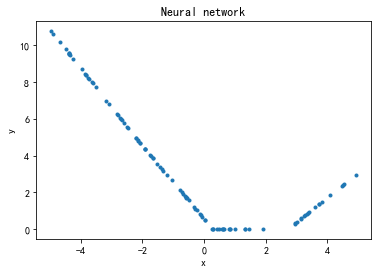

In [8]:
def g(x: np.ndarray) -> np.ndarray:
    """ReLU: element-wise maximum of x and 0
       x: np.ndarray of any shape
    """
    return np.maximum(x,0)

def neuralnet(x: np.ndarray,W1: np.ndarray,W2: np.ndarray,b1: np.ndarray,b2: np.ndarray) -> np.ndarray:
    """
    input:
    x: np.ndarray of shape n x d where n is number of data points and d is dimension of data points
    W1: np.ndarray of shape d2 x d where d2 is the width of layer 2
    W2: np.ndarray of shape d3 x d2 where d3 is the width of the output layer
    b1: np.ndarray of shape d2 x 1
    b2: np.ndarray of shape d3 x 1
    Note: in this problem d=d3=1
    
    output:
    np.ndarray of shape d3 x n
    """
    a2 = g(W1 @ x.T + b1)  # (d2,n)  #insert correct code here
    z3 = g(W2 @ a2 + b2)  # (1,n) #insert correct code here
    return z3


n=100
x = np.random.rand(n,1)*10-5
W1 = np.random.randn(5,1)
b1 = np.random.randn(5,1)
W2 = np.random.randn(1,5)
b2 = np.random.randn(1,1)

y = neuralnet(x,W1,W2,b1,b2)
assert y.shape == (1,n)
plt.plot(x[:,0], y[0],'.')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Neural network")

# k-means clustering

- k-means clustering is a method of vector quantization

    Quantization is the process of constraining an input from a continuous or otherwise large set of values to a discrete set , such as the integers)

- originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest **mean** vector (cluster center/centroid), serving as a prototype of the cluster. 

One way to think about clustering is to consider a representative of a group (that representative need not belong to that group), and an assignment of actual data points to that representative. 

One way to consider a good clustering is that in some measure, the data points are **close to** their representative.

One reasonable goal is to find the assignments that minimize the **squared error**. 

$$
\underset{a_1,a_2,...,a_n}{\arg \min} \sum_{i=0}^{n-1} \|\mathbf{x}_i - \mu_{a_i} \|_2^2
$$
subject to the constraint that $a_j \in \{0,1,2,...,k-1\}$

Where $\mathbf{x}_i \in \mathbb{R}^{2}$ is $i^{th}$ data example, or the $i^{th}$ row of the matrix $X \in \mathbb{R}^{n \times 2}$, which we also denote as $X_{(i,:)}$. 
Where $\mathbf{x}_i $ is $i^{th}$ data example, or the $i^{th}$ row of the matrix $X \in \mathbb{R}^{n \times 2}$, which we also denote as $X_{(i,:)}$. 

$\mu_j \in \mathbb{R}^{2}$ is the $j^{th}$ row of the matrix `mu` $\in \mathbb{R}^{k \times 2}$ defined above. 

Note that there are only $k$ different $\mu_j$ vectors. Thus, when we write $\mu_{a_i}$, then that just means we are considering the $(a_i)^{th}$ row of the matrix `mu` above. 

This is valid since $a_i \in \{0,1,...,k-1\}$.

In [44]:
def findassignment(X: np.ndarray, mu: np.ndarray) -> np.ndarray:
    """
    input:
    X: np.ndarray of shape n,d where n is the number of examples and d is the dimension of the data
    mu: np.ndarray of shape k,d where k is the number of reps and d is the dimension
    
    output:
    a: np.ndarray of shape (n,) where a[i] is assignment of example i
    """
    a=np.zeros(X.shape[0],dtype=int)
    for j in range(X.shape[0]):
        min_dist = float('inf')
        for i, rep in enumerate(mu):
            dist = np.linalg.norm(X[j] - rep)
            if dist < min_dist: 
                min_cluster = i 
                min_dist = dist 
        a[j] = min_cluster
    return a

def findrep(X: np.ndarray, a: np.ndarray, k: int) -> np.ndarray:
    """
    input:
    X: np.ndarray of shape n,d where n is the number of examples and d is the dimension of the data
    a: np.ndarray of shape (n,) where a[i] is assignment of example i
    k: integer, total number of clusters
    output:
    mu : np.ndarray of shape k,d where k is the number of reps and d is the dimension
    """
    mu = np.random.randn(k, X.shape[1])
    for j in range(k):
        if np.sum(a == j) == 0:  # if no assignment of j exists, randomly initialize representative
            mu[j] = np.random.randn(X.shape[1])
        else:
            mu[j]= np.mean(X[a == j], axis=0)  ##your solution here
            
    return mu

def kmeans(X: np.ndarray, k: int=4) -> Tuple[np.ndarray, np.ndarray]:
    """
    input:
    X: data. np.ndarray of shape n,d where n is the number of examples and d is the dimension of the data
    k: total number of clusters
    
    output:
    mu : representatives. np.ndarray of shape k,d where k is the number of reps and d is the dimension
    a: assignments. np.ndarray of shape (n,) where a[i] is assignment of example i
    """
    # randomly initialize k representatives
    mu = np.random.randn(k, X.shape[1])
    for i in range(5):
        a = findassignment(X,mu)
        mu = findrep(X,a,k)

        # colors = np.array(['red','blue','green','black'])
        # plt.scatter(X[:,0],X[:,1], c=colors[a], s=5, label="Data points")
        # plt.scatter(mu[:,0],mu[:,1], c=colors, s=100, edgecolor='gold', linewidth=3, label="Representatives")
        # plt.legend(bbox_to_anchor=(1.4, 1))
        # plt.xlabel(r"$x_1$")
        # plt.xlabel(r"$x_2$")
        # plt.title(f"K-means clustering, iteration {i}")
        # plt.show()

    return a, mu

## Mimic data

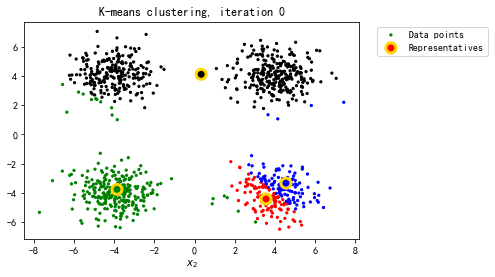

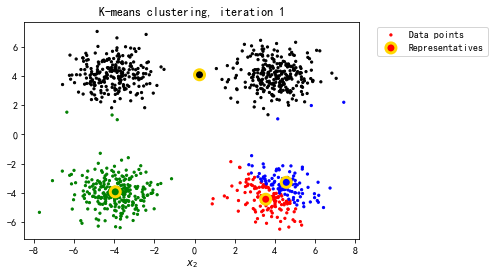

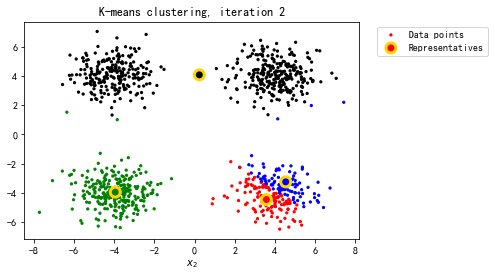

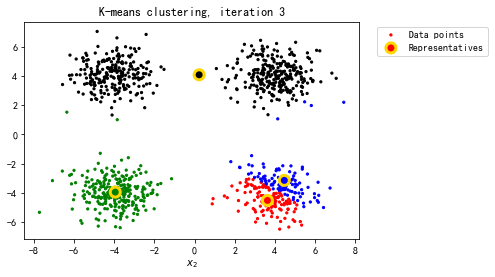

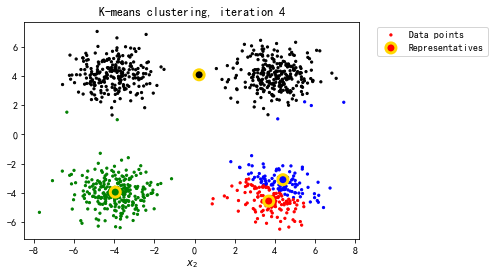

In [40]:
n=1000  # sample size
X=np.random.randn(n,2)+4*(2*((np.random.rand(n,2))>0.5)-1) # data
a, mu = kmeans(X, k=4)

## MNIST

### load data

In [42]:
# Load MNIST train data (60000) and test data (10000)

filename = "/Users/wenxinxu/Desktop/SDS565/data/MNIST/"

## training data and labels
# load training image data
f=open(filename + 'train-images-idx3-ubyte','rb')
gimage=f.read()
f.close()

# load training labels
f=open(filename + 'train-labels-idx1-ubyte','rb')
g=f.read()
f.close()

n_train = 60000
n_test = 10000
dimH, dimW = 28, 28

# create training matrix 60000 x 28 x 28
train=np.array(bytearray(gimage[16:])).reshape(n_train,dimH,dimW)
# train.shape = (n_train,dimH,dimW)
train_labels=np.array(bytearray(g[8:]))

## load image data
f=open(filename + 't10k-images-idx3-ubyte','rb')
gimage=f.read()
f.close()

## load labels
f=open(filename + 't10k-labels-idx1-ubyte','rb')
g=f.read()
f.close()

# create test matrix 10000 x 28 x 28
test=np.array(bytearray(gimage[16:])).reshape(n_test,dimH,dimW)
# test.shape=(n_test,dimH,dimW)
test_labels=np.array(bytearray(g[8:]))

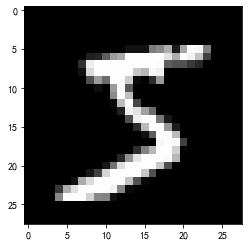

In [43]:
plt.imshow(train[0,:,:],cmap=plt.cm.gray)

### k-means clustering

The representatives are several digit number between 1 to 9

When k = 15, one clusters contain more than one class of digits

most common label in center 0 is 1
2414 images are clustered correctly and 307 images are clustered wrong in center 0


Text(0.5, 1.0, 'Example Image clustered wrong')

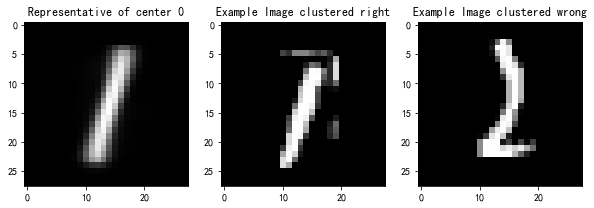

In [63]:
# perform k-means clustering to 60000 train images
ims = train.reshape(train.shape[0],28*28)  # reshape images to use them in k-means code
a, mu = kmeans(ims, k=15)  # (60000,), (15, 784)

# check out one of the representatives
center=0 
common_label = mode(train_labels[a==center])[0][0] 
right = train[a==center][train_labels[a==center] == common_label]  # (2414, 28, 28)
wrong = train[a==center][train_labels[a==center] != common_label]  # (307, 28, 28))
print(f"most common label in center {center} is {common_label}")
print(f"{right.shape[0]} images are clustered correctly and {wrong.shape[0]} images are clustered wrong in center {center}")

# print 3 images
fig, axs = plt.subplots(1, 3, figsize=(10, 6))
axs[0].imshow(mu[center].reshape(28,28),cmap=plt.cm.gray)
axs[1].imshow(right[0],cmap=plt.cm.gray)
axs[2].imshow(wrong[0],cmap=plt.cm.gray)

axs[0].set_title(f"Representative of center {center}")
axs[1].set_title("Example Image clustered right")
axs[2].set_title("Example Image clustered wrong")